I left off part 1 with some preliminary analysis of the budget vs revenue. The 2 indicate that they are both of the gamma distribution type. Conclusion that was not reached in the previous memo included the fact that budget...although a good indicator, does not do too hot when regression upon revenue. Little outliers such as Avengers, Gone with the Wind and fucking Marvel in general makes my miracle model don't work too well. 

So here's to part 2 in hope that my additional analysis upon the various variables prove fruitful

In [1]:
#libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from ast import literal_eval
import statsmodels.api as sm
import statsmodels.formula.api as smf
%matplotlib inline

In [2]:
#reload file
df = pd.read_csv("C:/Users/heesu/Downloads/TMDB_Agg.csv") #simple load

In [3]:
#also friggin reload preliminary steps
df['year'] = pd.DatetimeIndex(df['release_date']).year
df['month'] = pd.DatetimeIndex(df['release_date']).month
modern = df[(df.year < 2019) & (df.year >= 2000)]

Let's get back to it. So we know that Budget~Gamma() and Revenue~Gamma(). So the appropriate way to be able to value anything that has a constant variance would be able to take the log of Revenue to have any resemblance of constant variance. If that were the case then we should take the log of both sides of the equation. In this case it would actually be 

$$ log(Y) = \log(e^{\beta_0 + \beta_1 * Budget})$$ translating to
$$ Y = \beta_0 + \beta_1 * Budget $$

For the people reading this it might jump out this might be the first step that people should do for such a distribution with a statiscal model depicting a gamma regression like that. However one thing to keep in mind the nature of these distribution doesn't translate so smoothly. 

In [4]:
#let's get right back to it
X = np.log(modern.budget)
y = np.log(modern.revenue)
X = sm.add_constant(X)
budget_mod = sm.OLS(y,X).fit()
budget_mod.summary()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


MissingDataError: exog contains inf or nans

Well fantastic, divide by zero is an issue of course. Usually you can't pull that shenanigan anywhere. So in this case what we shall attempt is to take the log of revenue and keep budget to be a standard variable

In [5]:
#Let's see where budget fucked up
modern[modern.budget == 0].head()

,Unnamed: 0,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,...,crew,revenue,averageRating,numVotes,runtimeMinutes,tconst,directors,writers,year,month
4,4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,...,"[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,5.8,283,118,tt1380152,nm3334279,nm3334279,2009,2
7,7,8,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,...,"[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511,7.8,4914,84,tt0391024,nm0636675,"nm1646089,nm0636675",2004,1
17,17,18,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt1700845,en,The Invisible Woman,"In 1857, at the height of his fame and fortune...",...,"[{'credit_id': '53b94a260e0a2676c7009b37', 'de...",1234254,6.2,8576,111,tt1700845,nm0000146,"nm0604448,nm1597463",2013,12
22,22,23,"[{'id': 207621, 'name': 'V/H/S Collection', 'p...",0,"[{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...",http://www.magnetreleasing.com/vhs/,tt2105044,en,V/H/S,When a group of misfits is hired by an unknown...,...,"[{'credit_id': '52fe48ee9251416c9109d113', 'de...",100345,5.8,52482,116,tt2105044,"nm1488800,nm2318753,nm1417392,nm2419470,nm1846...","nm3800493,nm1440023,nm1410159,nm2807330,nm1488...",2012,7
23,23,24,NaN,0,"[{'id': 53, 'name': 'Thriller'}, {'id': 9648, ...",http://insightthemovie.com/,tt1687277,en,InSight,"Kaitlyn, an ER nurse who is tending to a young...",...,"[{'credit_id': '52fe4980c3a368484e12e993', 'de...",17011,4.9,947,92,tt1687277,nm0299923,"nm1420267,nm1421040",2011,9


Well this is quite unfortunate. A quick check tells me there is about 400 movies with a budget 0. Not only is that impossible, that's just bad data. And going by how we had an $R^2$ of 62% earlier. I'm inclined to believe that is now heavily skewed to be bad. 2nd a Gamma distribution can't have 0... 

Approximately about 13% of the population have budget of 0. Well if that's the case we do need to do something about it. Let's see we can get a histogram for the budget that ain't 0 to begin with

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


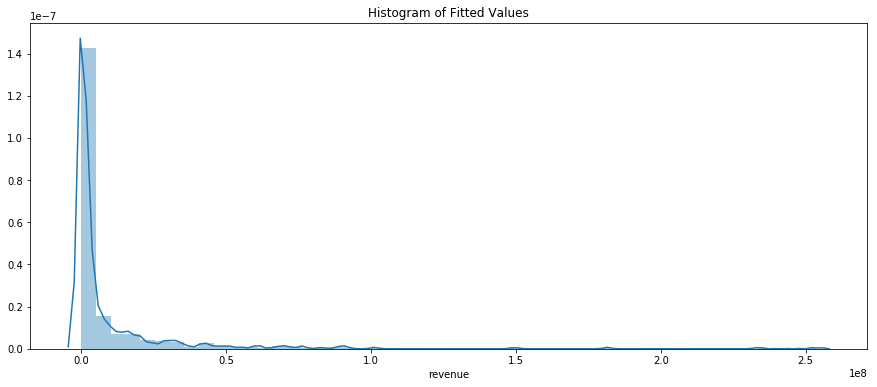

In [6]:
dims = (15,6)
fig, ax = plt.subplots(figsize = dims)
sns.distplot(modern[modern.budget == 0].revenue, kde=True)
ax.set_title('Histogram of Fitted Values');

Mama Mia! This is no bueno. Of the 400 movies that have 0 budget it seems like there are a couple of which have 250M in revenue. That's a significant revenue enough not to ignore. For instance, let's see if the distribution of budget = 0 is similar to the overall structure

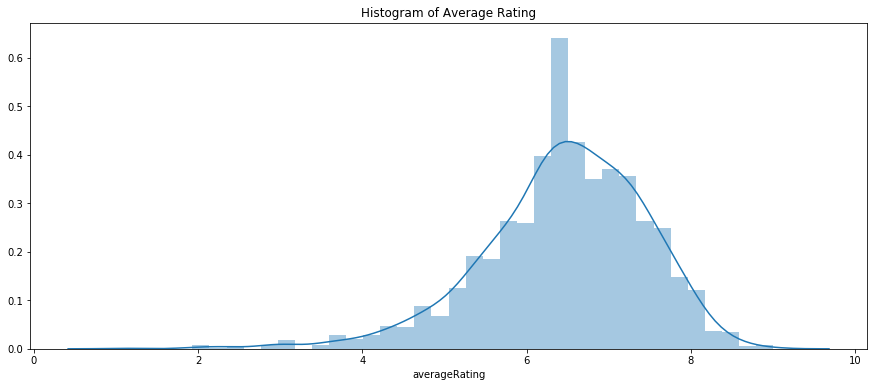

In [7]:
dims = (15,6)
fig, ax = plt.subplots(figsize = dims)
sns.distplot(modern.averageRating, kde=True)
ax.set_title('Histogram of Average Rating');

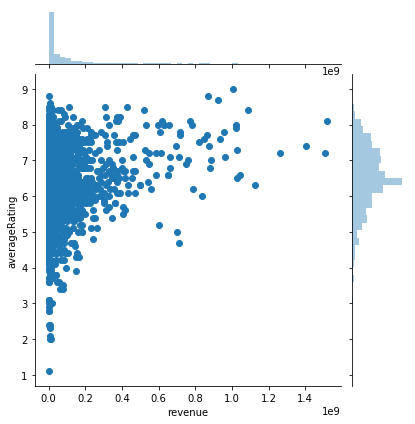

In [8]:
dims = (15,6)
sns.jointplot(modern.revenue, modern.averageRating)

In [9]:
budget_model = smf.ols(formula='budget~averageRating+numVotes+runtime+C(month)-1', data = modern).fit()

In [10]:
budget_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 budget   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     77.92
Date:                Sat, 20 Apr 2019   Prob (F-statistic):          4.71e-174
Time:                        22:59:05   Log-Likelihood:                -34509.
No. Observations:                1839   AIC:                         6.905e+04
Df Residuals:                    1824   BIC:                         6.913e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
C(month)[1]    3.648e+07   6.54e+06      5.575      0.000    2.36e+07    4.93e+07
C(month)[2]    3.812e+07   6.56e+06      5.808      0.000    2.52e+07     5.1e+07
C(month)[3]    4.682e+07   6.56e+06      7.136      0.000     3.4e+07    5.97e+07
C(month)[4]    4.272e+07   6.46e+06      6.610      0.000       3e+07    5.54e+07
C(month)[5]    4.896e+07   6.75e+06      7.249      0.000    3.57e+07    6.22e+07
C(month)[6]      5.7e+07   6.72e+06      8.486      0.000    4.38e+07    7.02e+07
C(month)[7]    4.391e+07   6.69e+06      6.568      0.000    3.08e+07     5.7e+07
C(month)[8]    3.786e+07   6.52e+06      5.808      0.000    2.51e+07    5.07e+07
C(month)[9]    3.316e+07   6.46e+06      5.131      0.000    2.05e+07    4.58e+07
C(month)[10]   3.863e+07   6.55e+06      5.896      0.000    2.58e+07    5.15e+07
C(month)[11]   4.767e+07   6.93e+06      6.884      0.000    3.41e+07    6.13e+07
C(month)[12]   4.676e+07   6.88e+06      6.800      0.000    3.33e+07    6.02e+07
averageRating -1.008e+07   8.93e+05    -11.288      0.000   -1.18e+07   -8.33e+06
numVotes        157.1608      5.736     27.401      0.000     145.912     168.410
runtime        3.453e+05   3.89e+04      8.871      0.000    2.69e+05    4.22e+05
==============================================================================
Omnibus:                      787.969   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6357.293
Skew:                           1.812   Prob(JB):                         0.00
Kurtosis:                      11.356   Cond. No.                     4.63e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.63e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

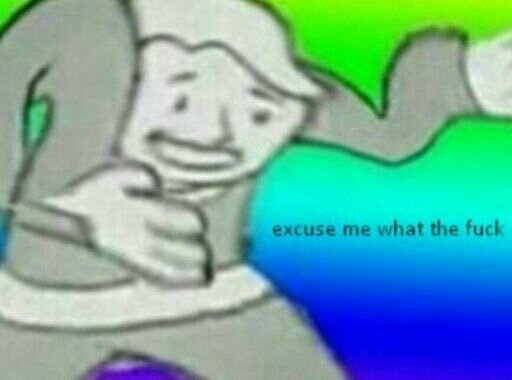

In [46]:
[item['name'] for item in literal_eval(modern.genres[1])]

['Comedy', 'Drama', 'Family', 'Romance']